# Summary

The **Servicer Viability** scenario group provides a series of different environments within which the profitability of the servicer role is examined. As services enter the network, servicers probabilistically attach to the new service, reflecting the (unknown) servicer decision-making process--in the simulation framework, this process is proxied by creating revenue expectations from attaching to the service as a moving average of prior realized revenue. At the same time, there is a chance that the servicer will _detach_ from their currently least-profitable service, reflecting the anecdotal evidence of this occurence in the current network. This attach/detach procedure, which occurs for every servicer, sets the stage for whether or not potential servicers find it profitable to enter the network, influencing the dynamics of servicer growth. Different protocol parameter values impacting profitability are varied to assess their importance and provide guidance on their values.

Because an exhaustive 'sweep' of every possible combination of relevant protocol parameters is computationally infeasible, this study has instead performed an **adaptive search**, whereby a coarse initial grid of parameters is successively refined by applying the success criteria to generated KPIs, and inferring a new 'direction' of search for a succeeding grid. Convergence is achieved when all success criteria are met across the performed simulations. Although it is always possible that multiple "equilibria" exist, such that success criteria are met by parameter combinations that are not found from adaptive search, the initial grid is informed by existing parameter values from the Pocket network and hence benefit from the expert knowledge used to define those initial values. 

Future work can perform a more thorough search of the underlying parameter space, in addition to performing more demand scenarios and realizations from the exogenous distributions that represent external factors.

# Contents

**Experimental Setup**: This covers the objective of the study and its methodology, describes the KPIs and success indicators (threshold inequalities), the protocol and environmental sweep parameters and their initial ranges, and finally summarizes the computational complexity of the simulations themselves.

**Adaptive Grid Results**: The evolution of the parameter selection process is presented as a visualization, showing the convergence of the protocol parameter ranges as different success criteria are achieved.

**Protocol Parameter Recommendations**: Based upon the adaptive grid results, the recommended parameter ranges are presented.

**Decision Tree and Parameter Importance**: Using the adaptive grid results, a machine-learning process is applied to infer the importance of different parameters on the associated KPI-based threshold inequalities. This provides a method of assessing whether one or more parameters are 'crucial' to success, in the sense that they have an outsized impact on the success criteria. This approach leverages decision trees that are fit to the results of the entire adaptive grid process.

**Parameter Impact on KPIs**: A density approach (histogram) can be used to assess the impact of protocol parameters on the KPIs of the scenario. The KPI densities are shown for each protocol parameter sweep value, providing a visual indication of the impact of the parameter on the density shape and location.

**Conclusion**: An overall assessment of the scenario results is provided, highlighting any problems, caveats, implications and possibilities for future/extended work.


# Experimental Setup

## Objective and Methodology

The objective of this scenario group is to provide assistance in the understanding of the impact on servicer profitability of a change in the number of services available.

- **System Goals Targeted**:
  - Economic Viability
  - Long-Term Value Generation
  - Accessibility
- **Design**: create a stochastic model of servicer entry, conditional upon 1) the arrival of a new service (chain) into the ecosystem, 2) the response of applications to the arrival of a new service, and 3) the resulting profitability of a potential servicer entering the ecosystem
- **Testing Variables**:
  - Environmental:
     - Introduce different probabilities that a servicer will attach to a newly-introduced service, ranging from a low probability (reflecting low expectations of profitability) to near certainty (reflecting high profitability expectations)
     - Introduce different probabilities that a servicer will detach from its lowest profit existing service, ranging from a low probability to certainty, to characterize different behaviors around the anecdotal evidence that servicers drop their least profitable service when joining a new service.
  - Protocol:
     - Assess the impact of different `RelaysToTokensMultiplier` (RTTM) values. The RTTM is the conversion rate between the relays that a servicer services and the tokens rewarded (referred to in the [V1 utility specification](https://github.com/pokt-network/pocket-network-protocol/tree/325d7adb691e7e6b1d448eab4455b292c115459c/utility#325-salary-eligibility--distribution) as "salary"). Low RTTM values reflect small rewards for servicing relays, impacting servicer revenue expectations and profitability.
     - Assess the impact of different `GatewayFeePerRelay` (GFPR) values. This is a direct cost assessed to gateways from having their relays served.
     - Assess the impact of different `ApplicationFeePerRelay` (AFPR) values. This is a direct cost assessed to applications from having their relays served.
     - Assess the impact of different `GatewayMinimumStake` (GMS) values. This is a running cost that must be fulfilled in order to participate as a gateway, and has an associated opportunity cost (value of using staked funds for an alternative use, proxied here by its investment in a risk-free instrument paying a 5% annual rate of return).
     - Assess the impact of different `ApplicationMinimumStake` (AMS) values. To prevent barriers to entry it is generally accepted that AMS < GMS, as applications are expected to operate on a smaller scale. But AMS values impact gateway profitability as well.
     - Assess the impact of different `DAOAllocation` (DAL) values. The DAO receives a fraction of the block reward, impacting servicer profitability.
     - Assess the impact of different `ValidatorFeePercentage` (VFP) values. The validator and DAO split transactions fees, which impacts the revenue of the DAO.

## KPIs

- Servicer NPV (KPI-1): The main KPI for this scenario group. This measures whether or not servicers are profitable.
- Gateway NPV (KPI-3): This measures whether or not gateways are profitable.
- POKT Circulating Supply (KPI-4): This is the total amount of POKT that is not staked by participants.
- POKT Available Supply (KPI-5): This the sum of circulating POKT (KPI-4) and POKT staked by participants.
- Net Inflation (KPI-D): This the the difference between the amount of new POKT created from block rewards and POKT burnt from slashing penalties, QoS adjustment etc. 
- DAO Value Capture (KPI-10): This is the ratio between the amount of POKT held in the DAO's Treasury and the total amount of POKT available supply (KPI-5).
- Servicer Capital Costs per Unit of Reward (KPI-14): This measures the trade-off that exists between the opportunity cost of being a servicer and the expected reward. Intuitively, the ecosystem should not 1) make it more attractive for servicers to exit the ecosystem (even if profitable), or 2) reduce security by rewarding participation to the extent that the stake does not become a deterrent to undesirable behavior.

## Threshold Inequalities

1. (**Servicer Capital Costs**) The average servicer cost per unit of reward must lie between $0.10$ and $0.90$. This inequality restriction is referenced in the code as `servicer_capital_costs_success`.
2. (**Servicer NPV**) The fraction of the Monte Carlo simulations for which Servicer NPV is greater than $750$ POKT must be at least $90$%. This inequality restriction is referenced in the code as `servicer_npv_success`.
3. (**Gateway NPV**) The fraction of the Monte Carlo simulations for which Gateway NPV is greater than $7500$ POKT must be at least $90$%. This inequality is referenced in the code as `gateway_npv_success`.
4. (**Circulating Supply**, **Available Supply**) The average fraction of circulating supply to available supply should not be less than $30$%. This inequality is referenced in the code as `circulating_supply_available_supply_ratio_success`.
5. (**Net Inflation**) The average net inflation rate of POKT should fall between $-0.10$ and $0.05$. This inequality is referenced in the code as `net_inflation_success`.
6. (**DAO Value Capture**) The fraction of the Monte Carlo simulations for which DAO value capture lies between $2$% and $10$% must be at least $90$%. This inequality is referenced in the code as `dao_value_capture_success`.

## Sweep Parameters

### Swept Protocol Parameters

1. `RelaysToTokensMultiplier` (`RTTM`)
2. `GatewayFeePerRelay` (`GFPR`)
3. `ApplicationFeePerRelay` (`AFPR`)
4. `GatewayMinimumStake` (`GMS`)
5. `ApplicationMinimumStake` (`AMS`)
6. `DAOAllocation` (`DAL`)
7. `ValidatorFeePercentage` (`VFP`) 

### Swept Environmental Parameters

1. The probability of a servicer attaching to a new service in the timestep the new service arrives, `service_linking_probability_just_joined`. Sweeping across different probabilities represents different servicer behaviors in response to a new service being available. A low probability of attachment indicates that the servicer prefers to maintain existing service connections, while a high probability represents servicers willing to adjust their service connections to accommodate the new service.
2. The probability of a servicer detaching from their least-profitable existing service they are attached to, `kick_bottom_probability`. This probability covers the hidden decision-making process of a servicer in determining whether or not they cease serving their least-profitable service. This process may include considerations of capacity, complexity or attention constraints faced by the servicer when adding a new service to existing services.

## Initial Parameter Sweep Ranges

Protocol and Environmental parameters were initialized for the first adaptive grid search according to:
1. Values found in the specifications provided to BlockScience ([V1 Mechanism spreadsheet](https://docs.google.com/spreadsheets/d/1Gpnw3ZXNh9lWFgmrbrg8wTqVKPD2M8QqJdAiAALru38/edit?usp=sharing), [V1 Minting spreadsheet](https://docs.google.com/spreadsheets/d/1QYe6NzuiyimsXs5cT1BSM-UT1DtX_K38cOZsEFJOtdA/edit?usp=sharing)),
2. Discussions with the Pocket team, and
3. BlockScience best practice. 

### Environmental Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| Probability, Attaching to New Service  | `service_linking_probability_just_joined` | (0.1, 0.5, 0.9) | Probability |
| Probability, Detaching from Worst Service  | `kick_bottom_probability` | (0.01, 0.05, 0.1) | Probability |

### Protocol Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| `RelaysToTokensMultiplier` | `RTTM` | (100, 200) | uPOKT/relay |
| `GatewayFeePerRelay` | `GFPR` | (10, 100) | uPOKT/relay |
| `ApplicationFeePerRelay` |`AFPR` | (10, 100) | uPOKT/relay |
| `GatewayMinimumStake` | `GMS`  | (1e5,2e5) | POKT |
| `ApplicationMinimumStake` | `AMS`  | (1e4, 2e4)  | POKT |
| `DAOAllocation` | `DAL`  | (0.05, 0.15) | %/100 |
| `ValidatorFeePercentage` | `VFP`  | (0.01, 0.10) | %/100 |

## Computational Complexity

**Total number of parameter constellations**: 1,152

**Total number of Monte Carlo runs per constellation**: 5

**Total number of experiments per adaptive grid**: 5,760

**Number of adaptive grid searches**: 6

**Total number of parameter constellations evaluated**: 34,560

# Adaptive Grid Results

In [2]:
import os
os.chdir("..")
from psuu import load_all_kpi_comparison_data, load_scenario_kpi_comparison_data, threshold_comparison_plot, decision_tree_feature_importance_plot, load_sweep

KPIs are referenced as:
servicer_capital_costs_success: 1
servicer_npv_success: 2
gateway_npv_success: 3
circulating_supply_available_supply_ratio_success: 4
net_inflation_success: 5
dao_value_capture_success: 6


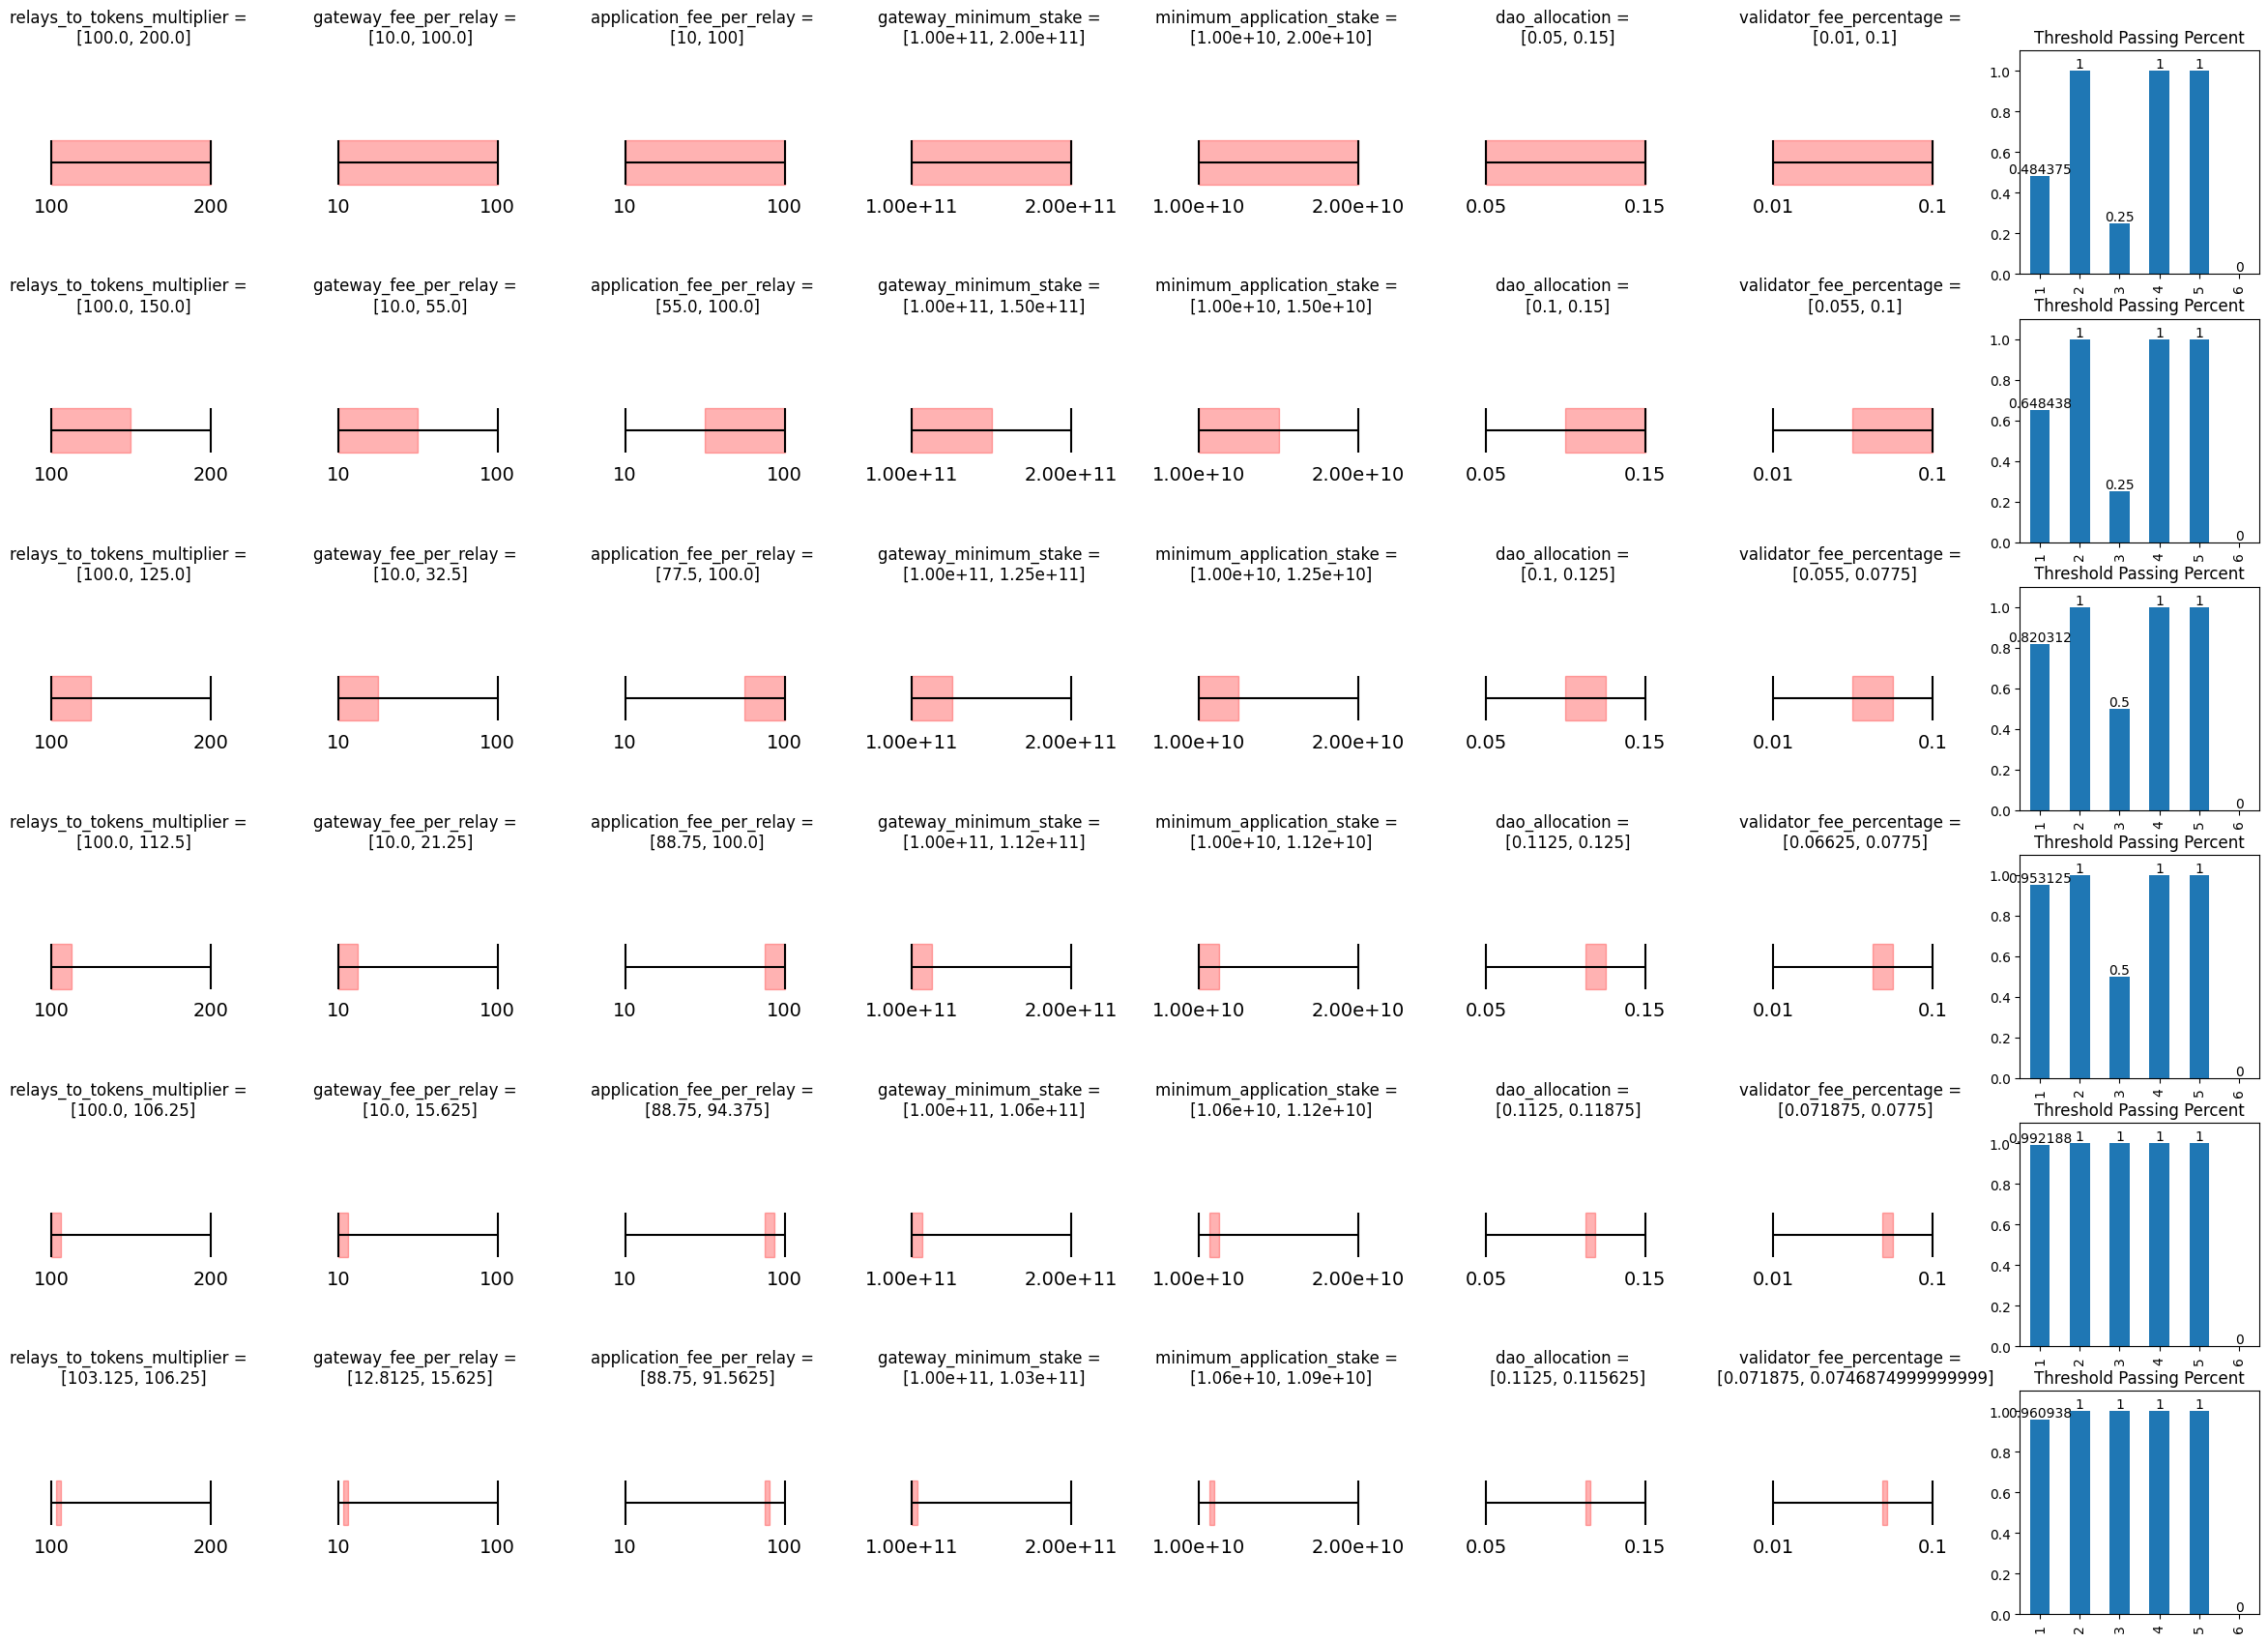

In [3]:
scenario_sweep_category = 'servicer_viability_ag'
kpis = load_scenario_kpi_comparison_data(scenario_sweep_category)
threshold_comparison_plot(kpis[scenario_sweep_category])

# Protocol Parameter Recommendations

From the adaptive grid results, the recommended parameter ranges for the swept protocol parameters are:

| Full Name |  Abbreviation | Recommended Range | Units |
| --- | --- | ---| ---|
| `RelaysToTokensMultiplier` | `RTTM` | (103.125, 106.250) | uPOKT/relay |
| `GatewayFeePerRelay` | `GFPR` | (12.8125, 15.625) | uPOKT/relay |
| `ApplicationFeePerRelay` |`AFPR` | (88.7500, 91.5625) | uPOKT/relay |
| `GatewayMinimumStake` | `GMS`  | (1.00e5,1.03e5) | POKT |
| `ApplicationMinimumStake` | `AMS`  | (1.06e4, 1.09e4)  | POKT |
| `DAOAllocation` | `DAL`  | (0.11250, 0.115625) | %/100 |
| `ValidatorFeePercentage` | `VFP`  | (0.0718750, 0.0746875) | %/100 |

# Decision Tree and Parameter Importance

## Decision Tree Classification

A decision tree is a machine-learning-based classifier. Given the simulation results, for each threshold inequality the tree recursively associates different _samples_ from the results, according to sorting criteria based upon one or more of the protocol parameters of the simulation.

Each decision tree below corresponds to one of the threshold inequalities stated above. Where the decision tree is 'empty', the threshold inequality was either 1) always fulfilled during the simulations, or 2) never fulfilled during the simulations. In this case no sensitivity analysis can be performed, as the threshold inequalities do not vary according to the different parameter combinations that were swept.

The title of the decision tree includes the threshold inequality under scrutiny, in addition to a technical 'score' (usually "100%") and the number of simulation results used as the dataset. Within the decision tree presented, each **non-terminal** 'node' is labeled with the following information:

1. The sorting variable used and its cutoff value used for classification, in the form of `parameter_name <= x` where `x` is the cutoff value. Branches to the left of this node indicate satisfaction of this inequality, while branches to the right indicate violations, i.e. `parameter_name > x`.
2. A Gini coefficient representing the method of recursive association used.
3. The total number of simulation results ("samples = y%") as a percentage "y" that are considered at this node.
4. The breakdown of the simulation results considered into the left and right branches ("value = [p, 1-p]"), where "p" is the fraction of results that satisfy the `parameter_name = x` constraint, and "1-p" the fraction satisfying `parameter_name > x`.
5. The classification of the majority of the simulation results at this node (note that this is not a final classification, as it appears in a non-terminal node, and can be arbitrary if the results are split equally across classes).

**Terminal** nodes ("leaves") represent the final classification of that proportion of the simulation results that arrive at the node, and have most of the same information as a non-terminal node, with the exception that there is no branching performed and hence no sorting variable displayed. Here the most important information is the classification (last line). 

Non-terminal and terminal nodes colored in blue correspond to the threshold inequality being met, and by following blue boxes from a terminal node up to the root of tree a set of `parameter_name <= x` and/or `parameter_name > x` sorting criteria can be chained together. 

Upon successful classification, it is usual for the terminal node to have a breakdown "value = [1.0, 0.0]" or "value = [0.0, 1.0]", indicating that 100% of the remaining simulation results treated are either satisfying the threshold inequality under treatment (left value is 1.0), or not satisfying the threshold inequality (right value is 1.0).

For further information regarding the decision tree approach adopted here please see the [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#) documentation from the `scikit-learn` library.

## Feature Importance

Below each non-empty decision tree is a bar graph indicating the relative importance of each swept protocol parameter ("feature") in determining the satisfaction of the threshold inequality. This leverages the use of "random forests", which is a technique to average over many different decision tree realizations over different subsets of the simulation results, assessing the relative contribution of each protocol parameter in the branching of each tree. Roughly speaking, the more times a protocol parameter was used in the branching process, the higher its importance is to the threshold inequality--in other words, the protocol parameter carries a larger 'weight' in determining satisfaction or violation of the inequality, and so the inequality is more sensitive to the values of the parameter.

For further information regarding the random forest and feature importance approach adopted here please see the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation from the `scikit-learn` library.

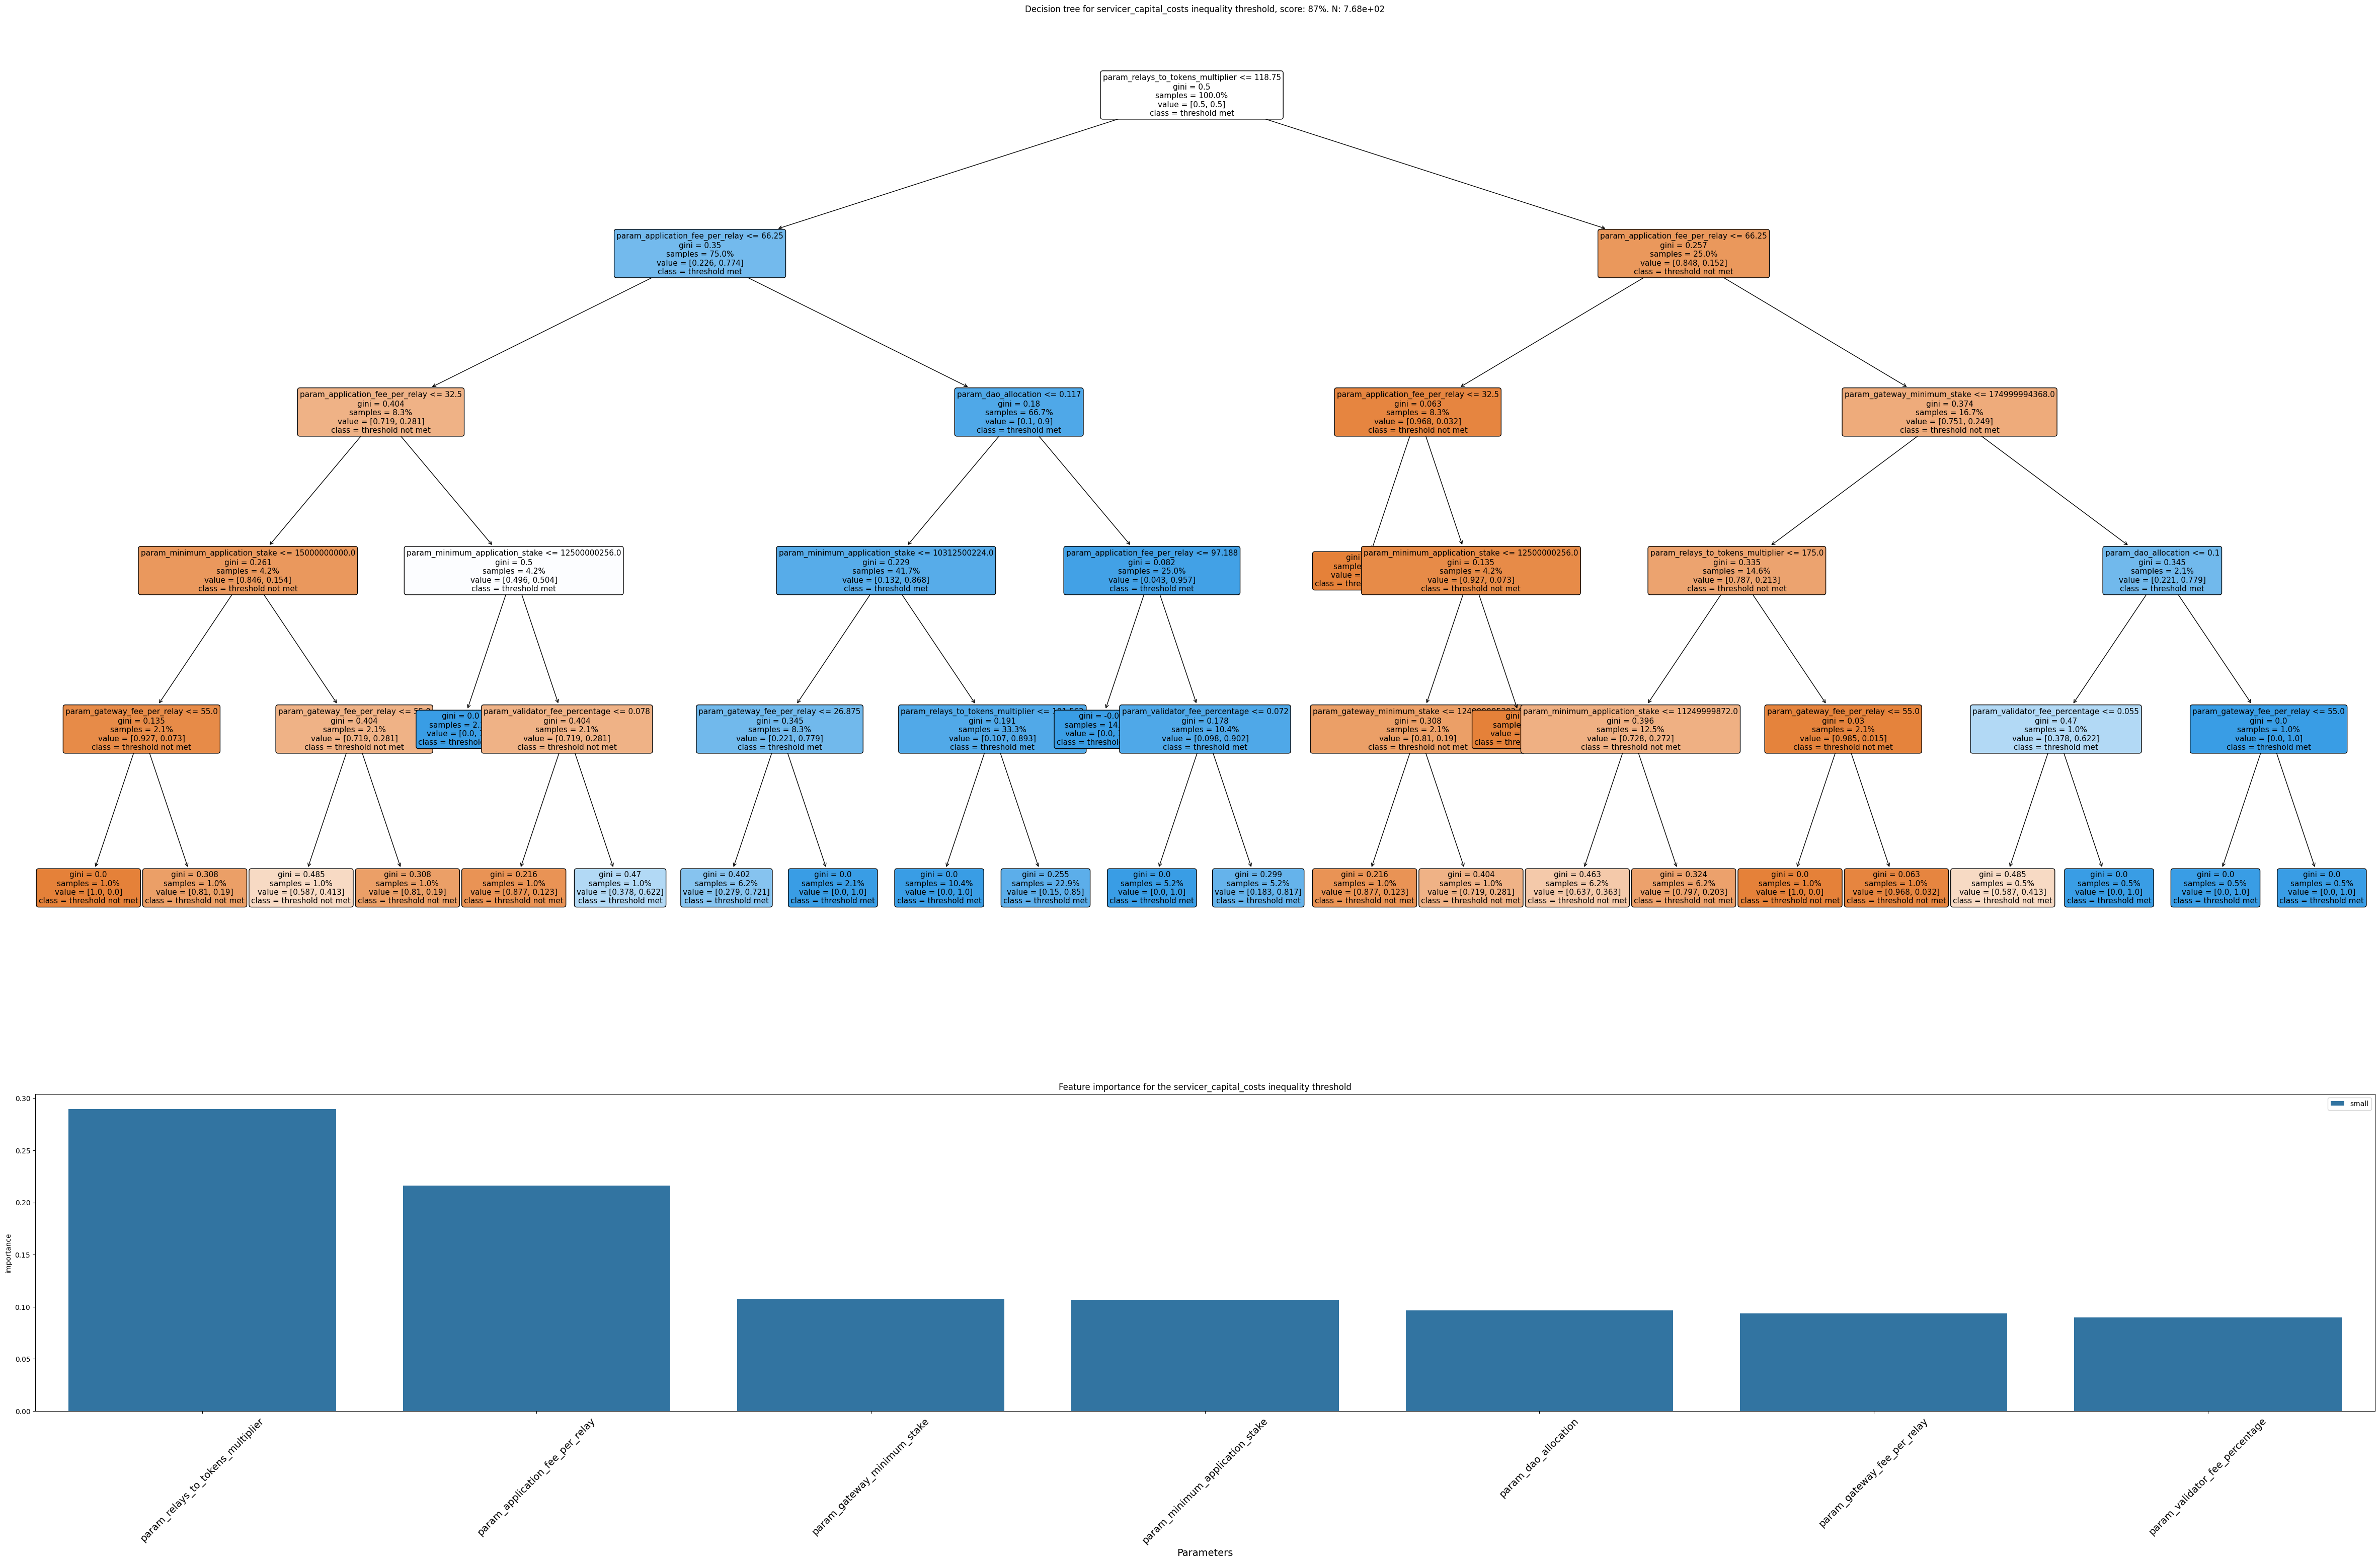

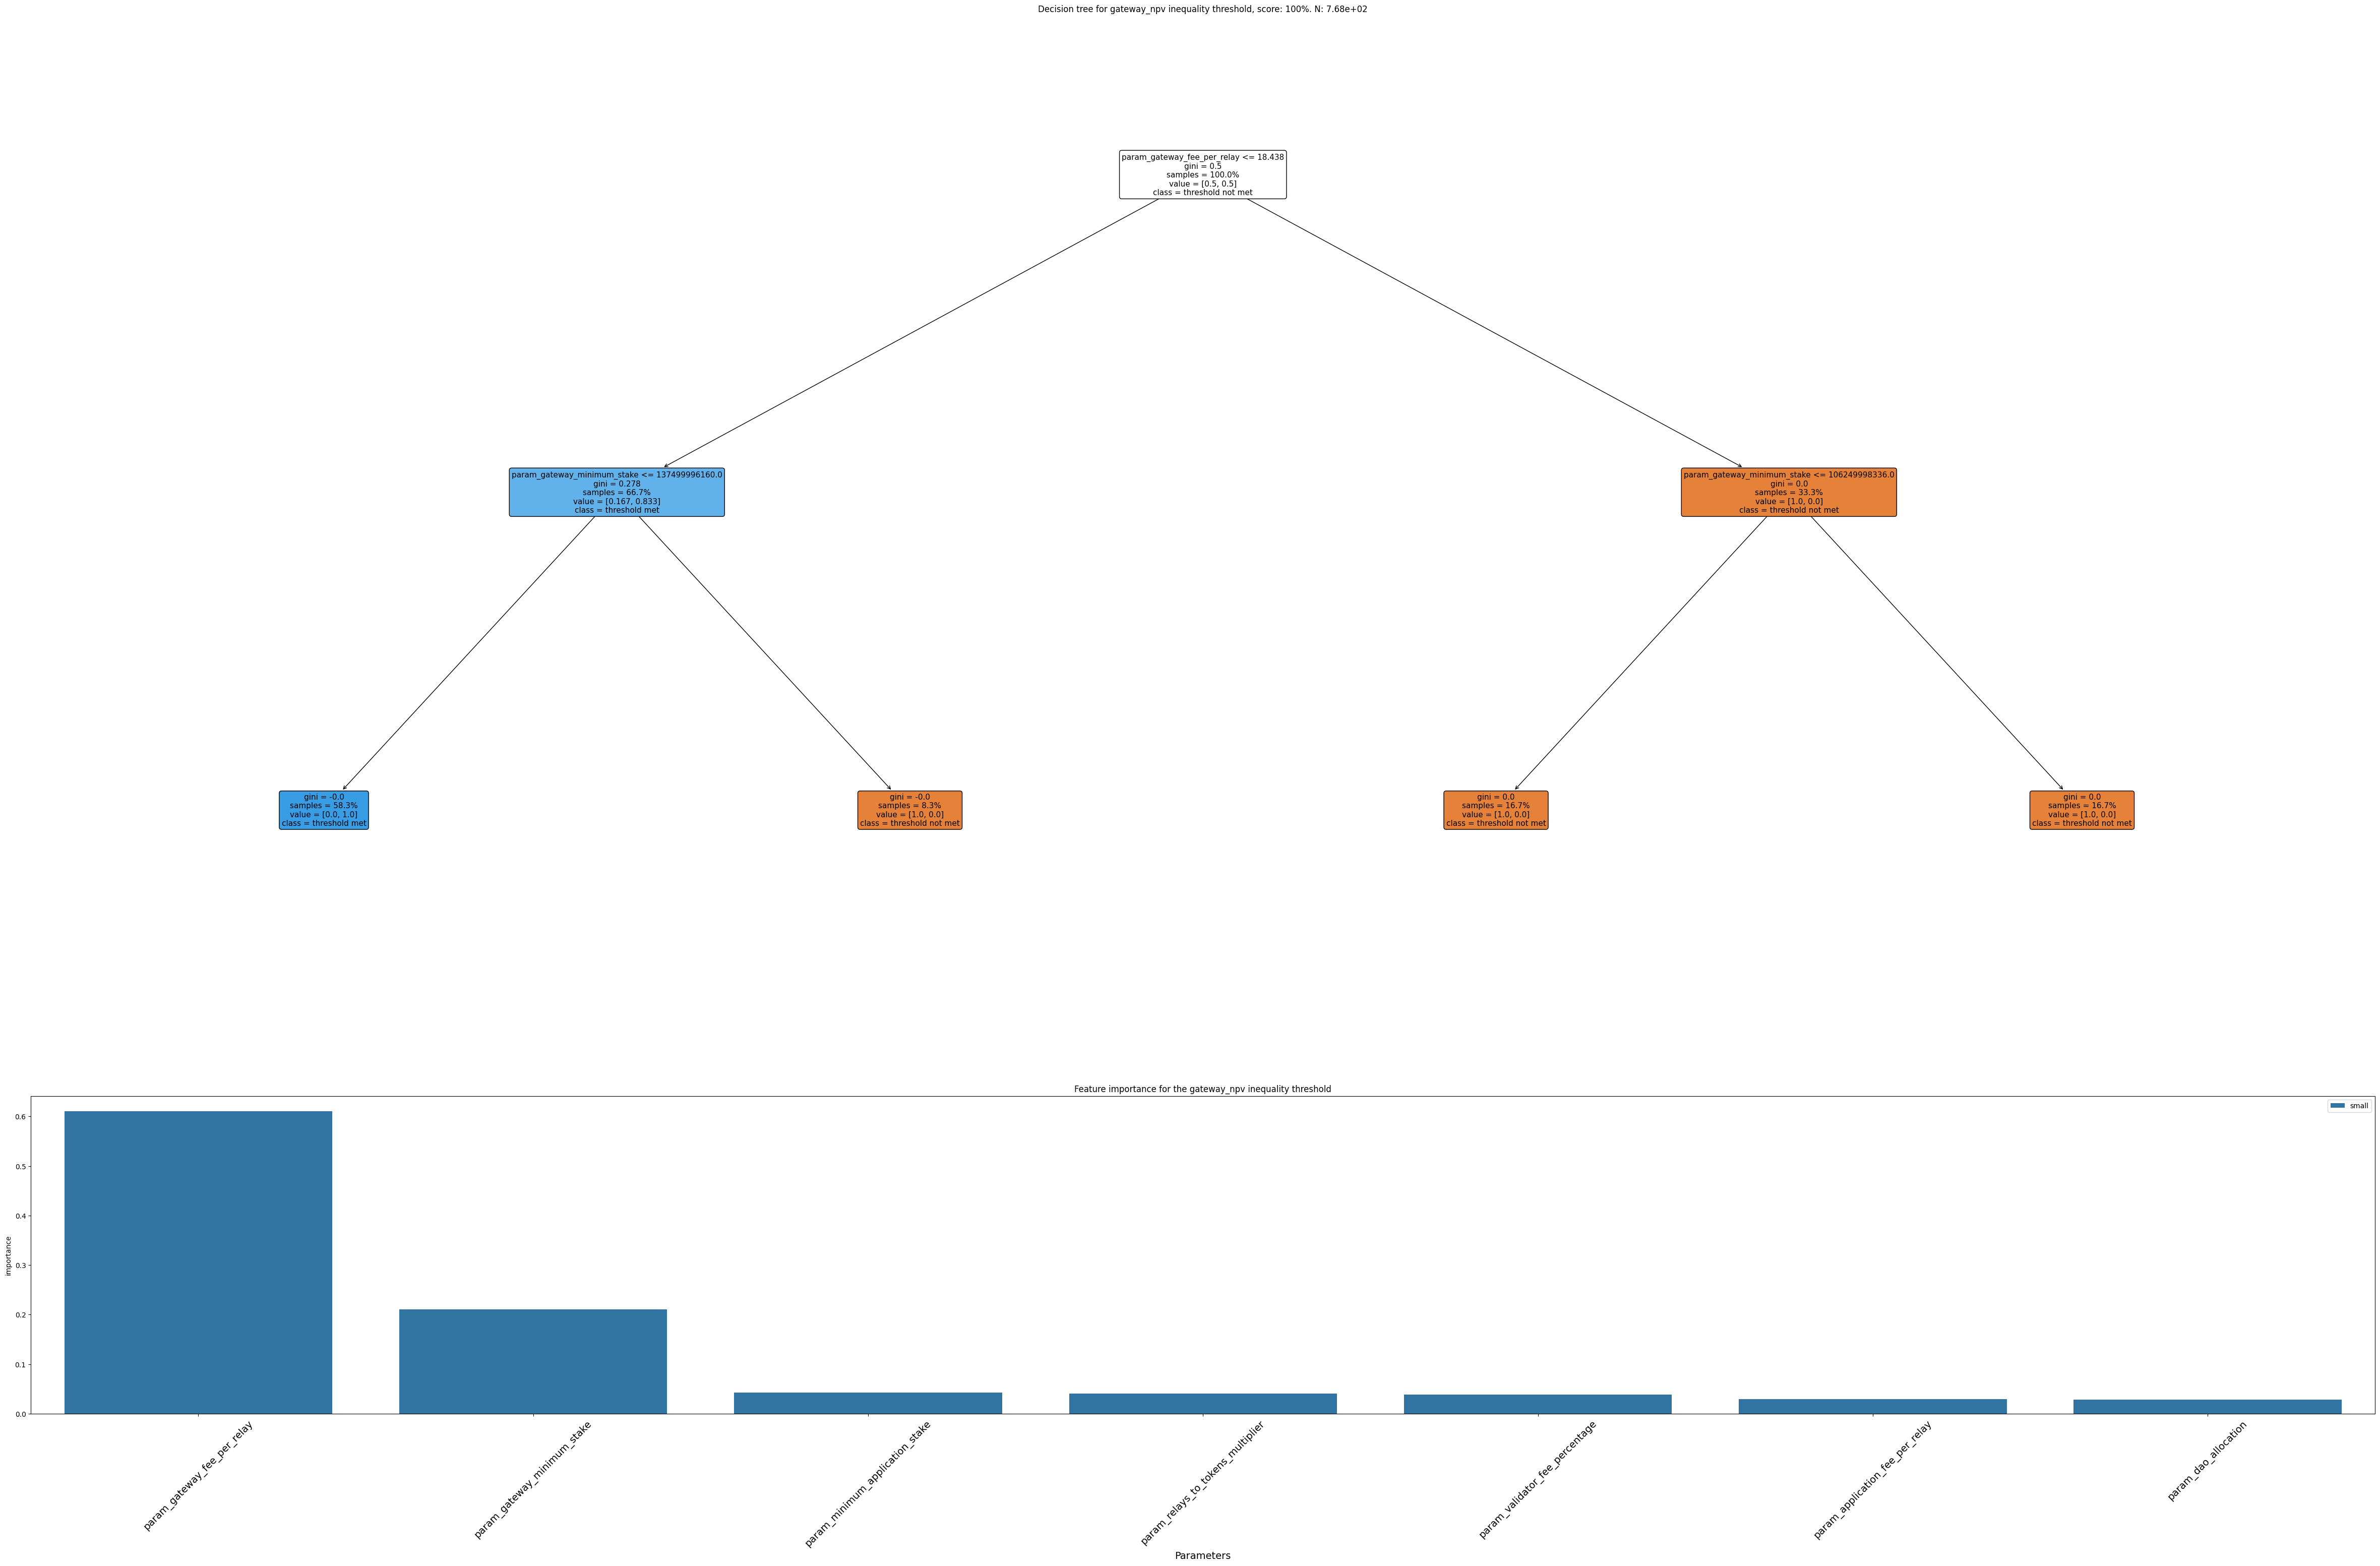

In [4]:
decision_tree_feature_importance_plot(scenario_sweep_category, height = 36, width = 60, font_size = 11)

# Parameter Impact on KPIs

The simulation results provide, for each combination of swept protocol parameter values ("parameter constellations"), a series of outcomes distinguished by different random realizations of stochastic ("Monte Carlo") distributions. Thus, each of the KPIs can be computed for each simulation result, and a _frequency distribution_ or _density_ of KPI values can be generated for each of the iterations of the adaptive grid approach. These densities can be further broken down by protocol parameter value, and the changes in the densities across different values can be visualized. This provides a method of assessing the sensitivity of the KPIs to the protocol parameters, both at the initial adaptive grid implementation, before optimization is performed, and at the end of the implementation, when the recommended parameter ranges have been achieved.

Each group of figures below corresponds to one of the protocol parameters. Each row in a figure group corresponds to a different KPI, and each column to the initial adaptive grid and final adaptive grid simulation results. Within a figure, the density corresponding to each swept value of the associated protocol parameter is presented (generally, the lower sweep value is displayed in blue, while the upper sweep value is in red, although this may not always be the case). 

By examining the changes in the shape of the KPI densities across sweep values and across the adaptive grid results, a qualitative visual assessment of how sensitive the KPI under scrutiny is to the swept protocol parameter can be made.

In [5]:
from psuu.parameter_impact_plots import *
merged_df = read_and_format_data(scenario_sweep_category=scenario_sweep_category)

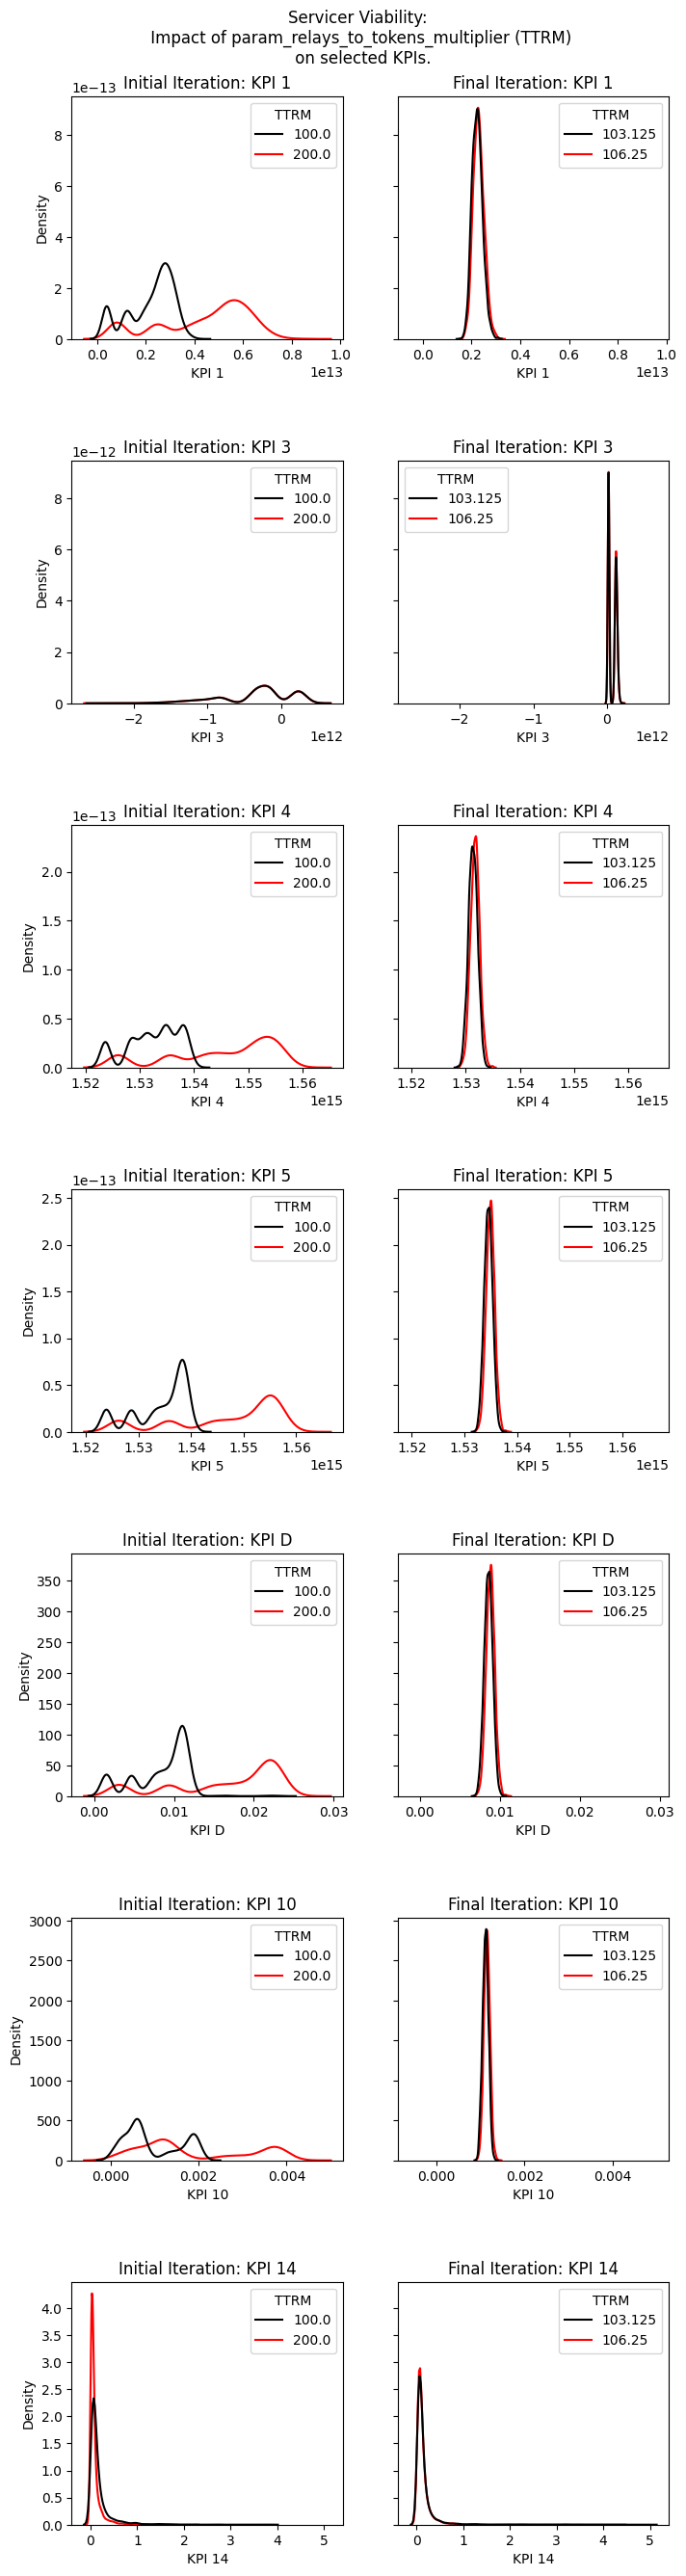

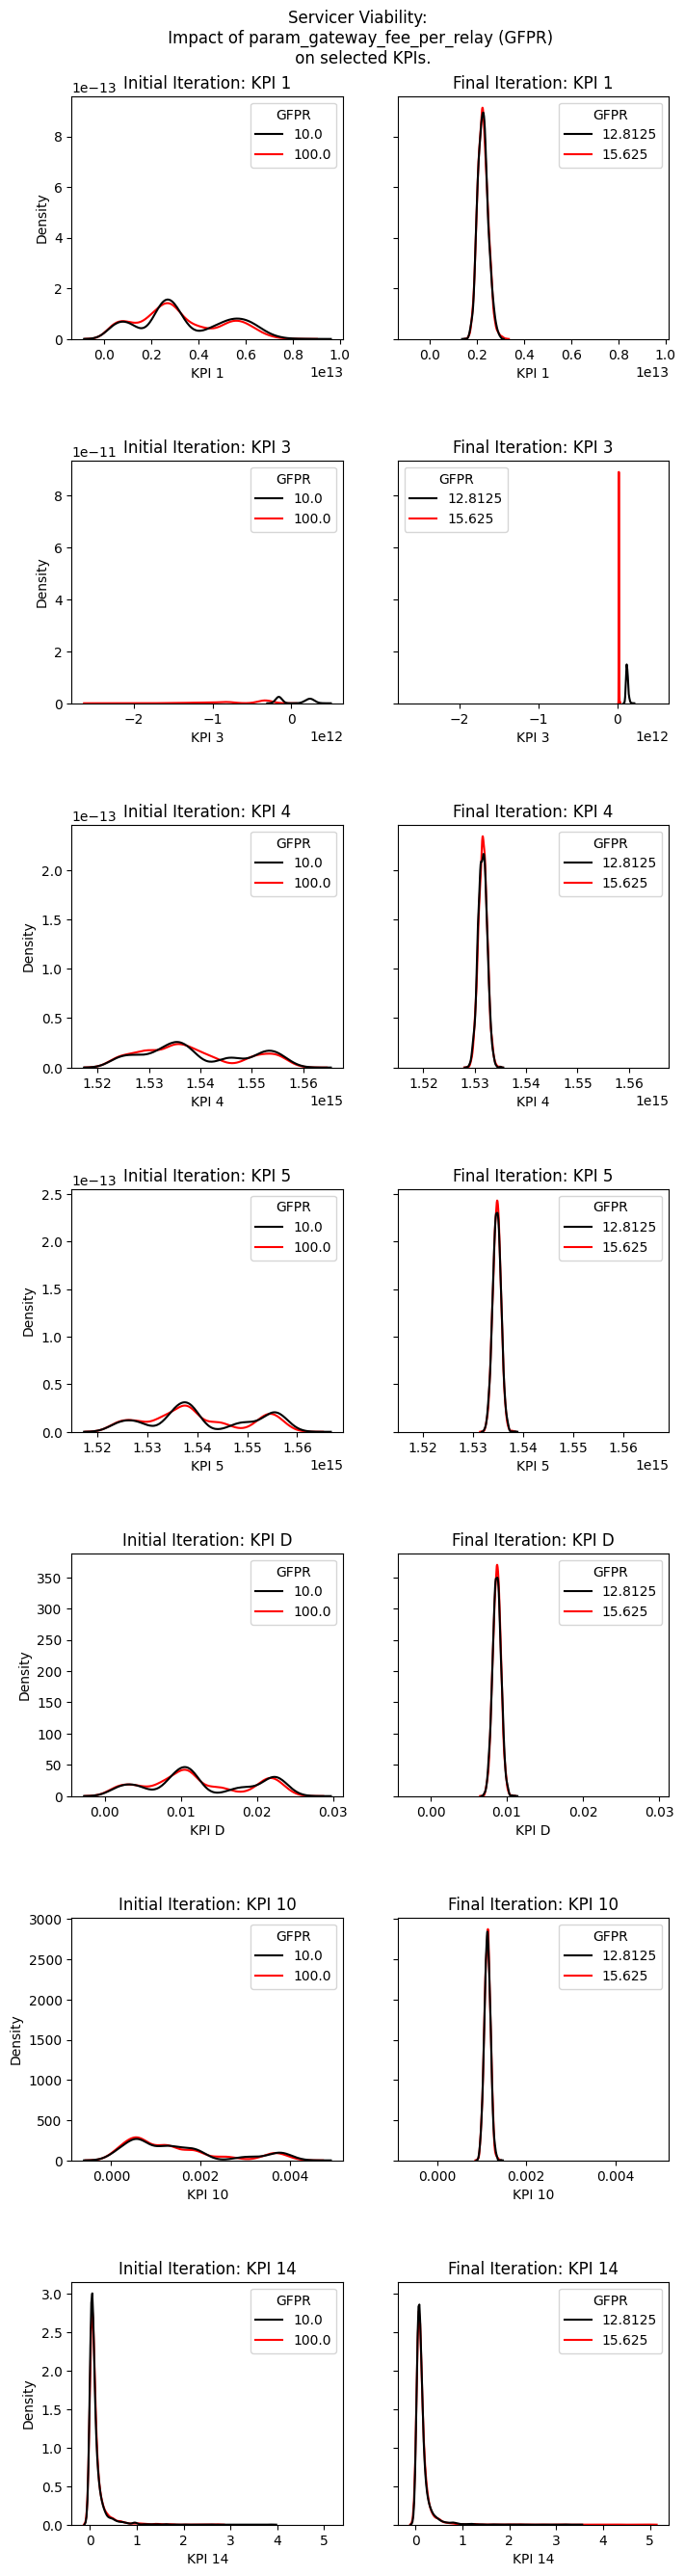

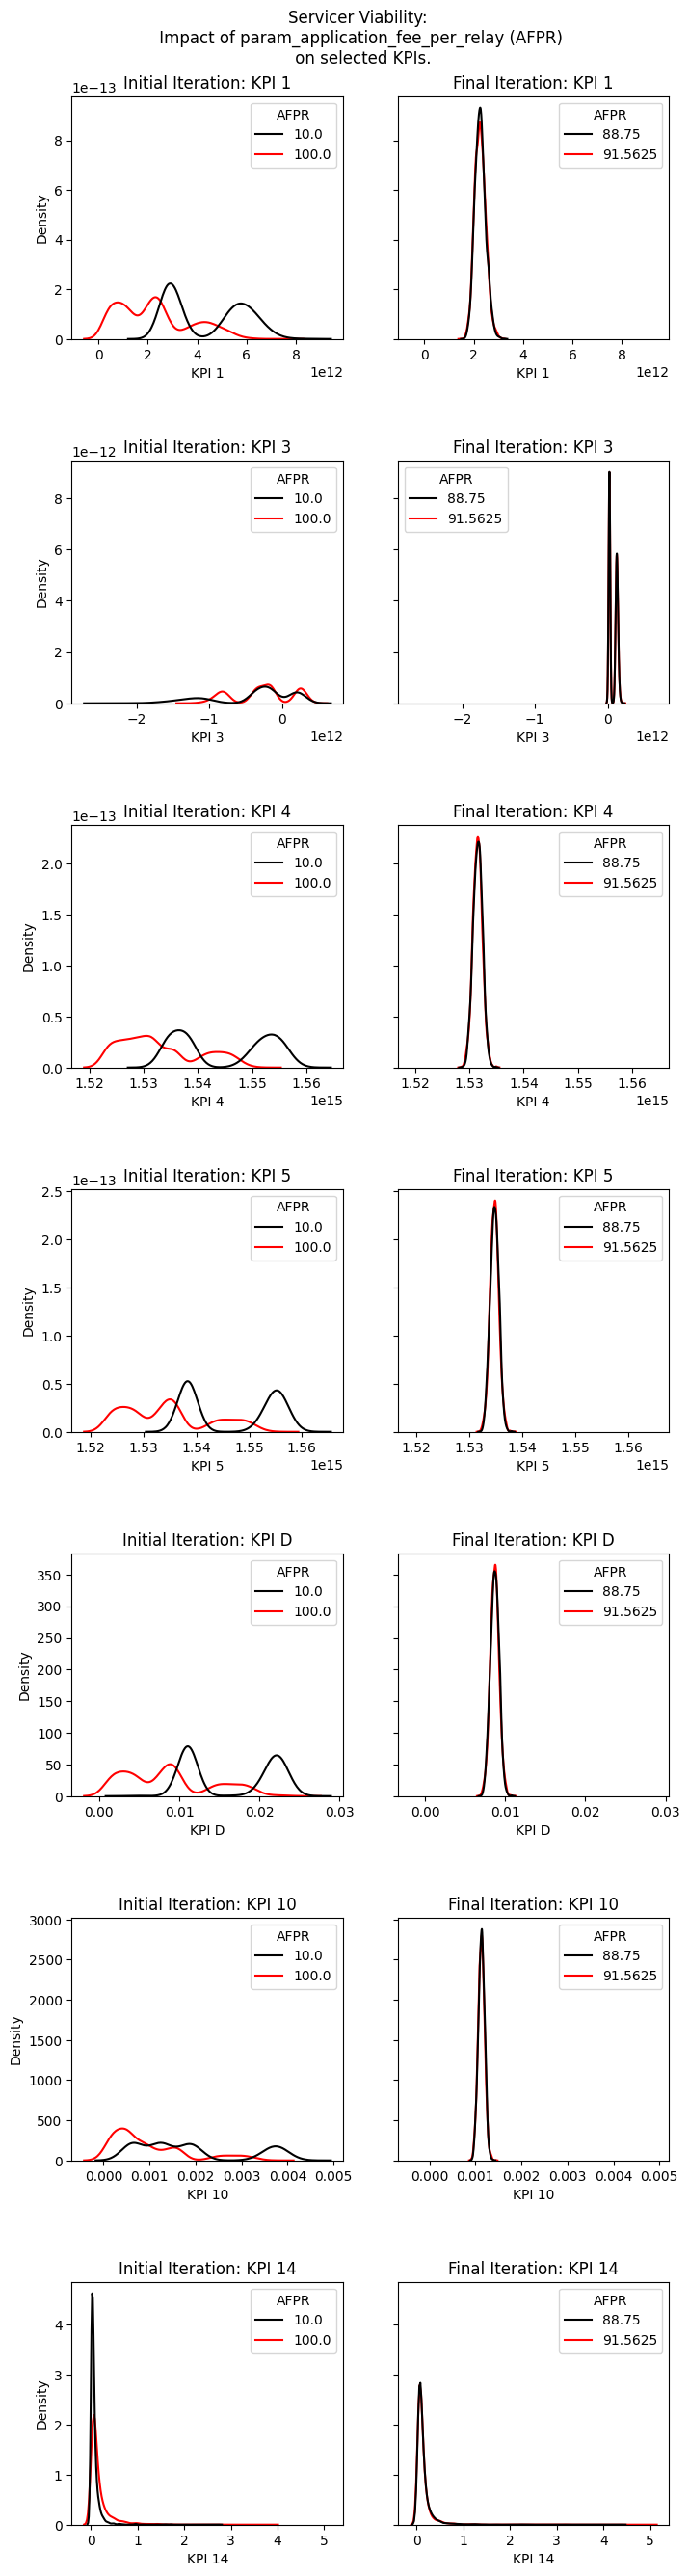

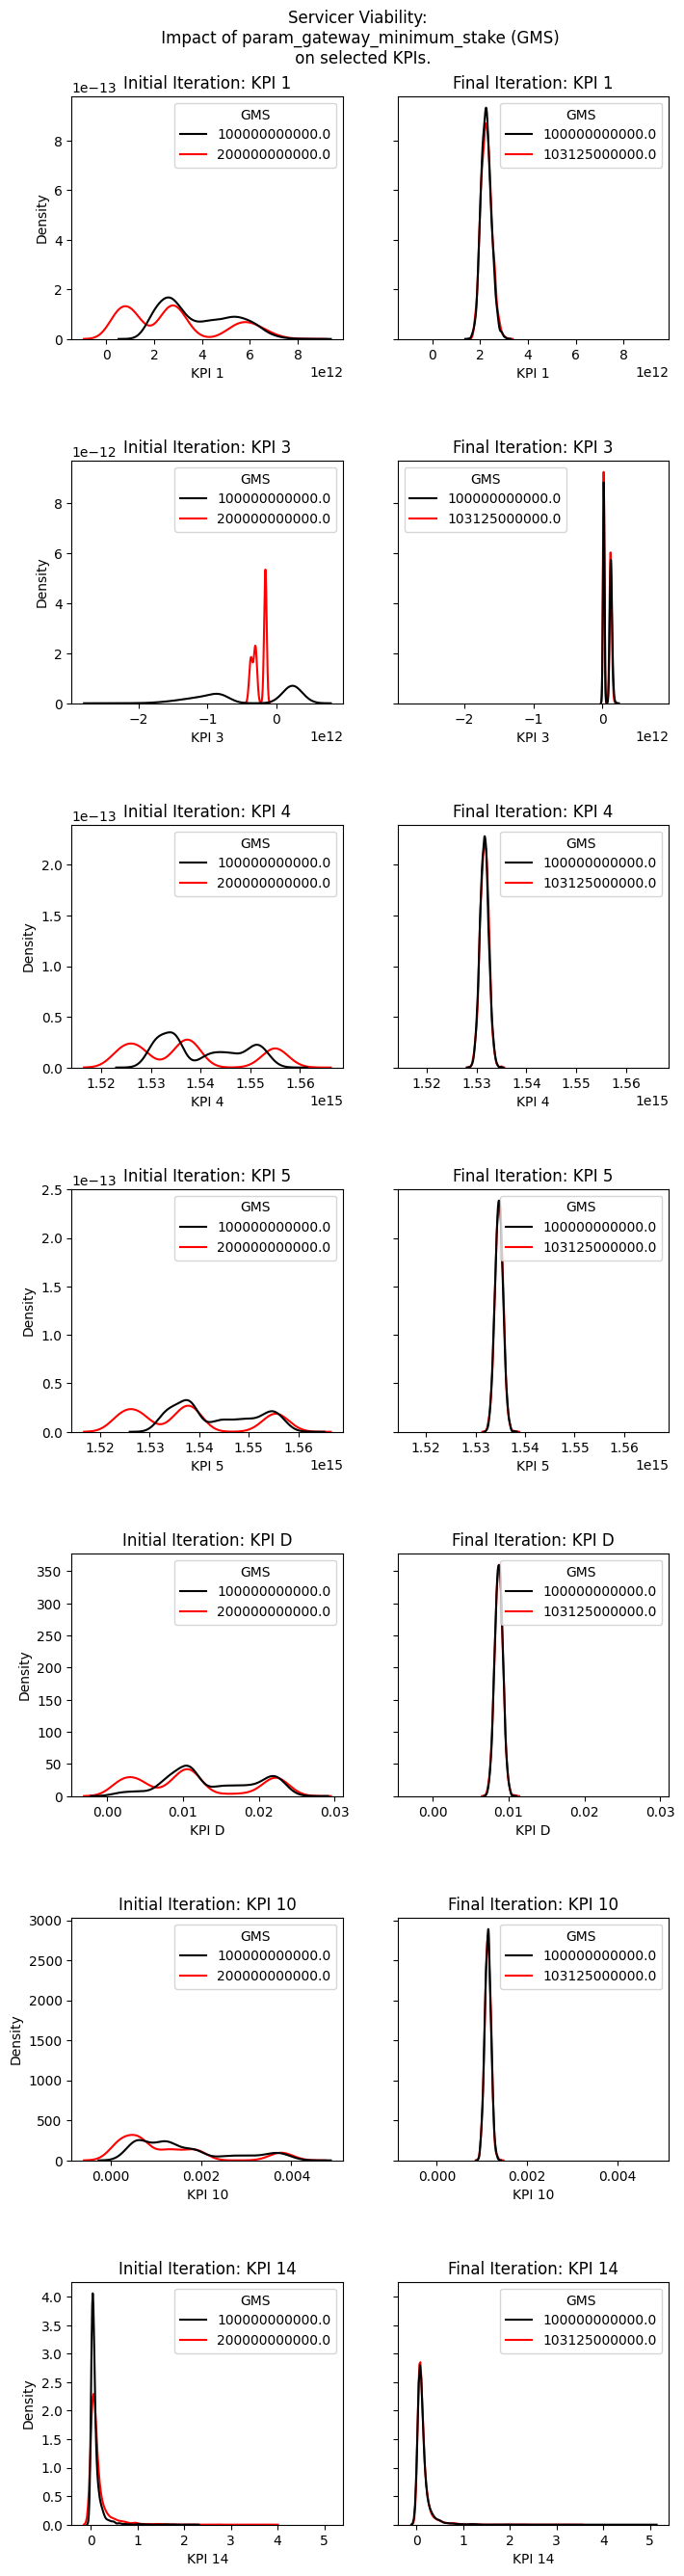

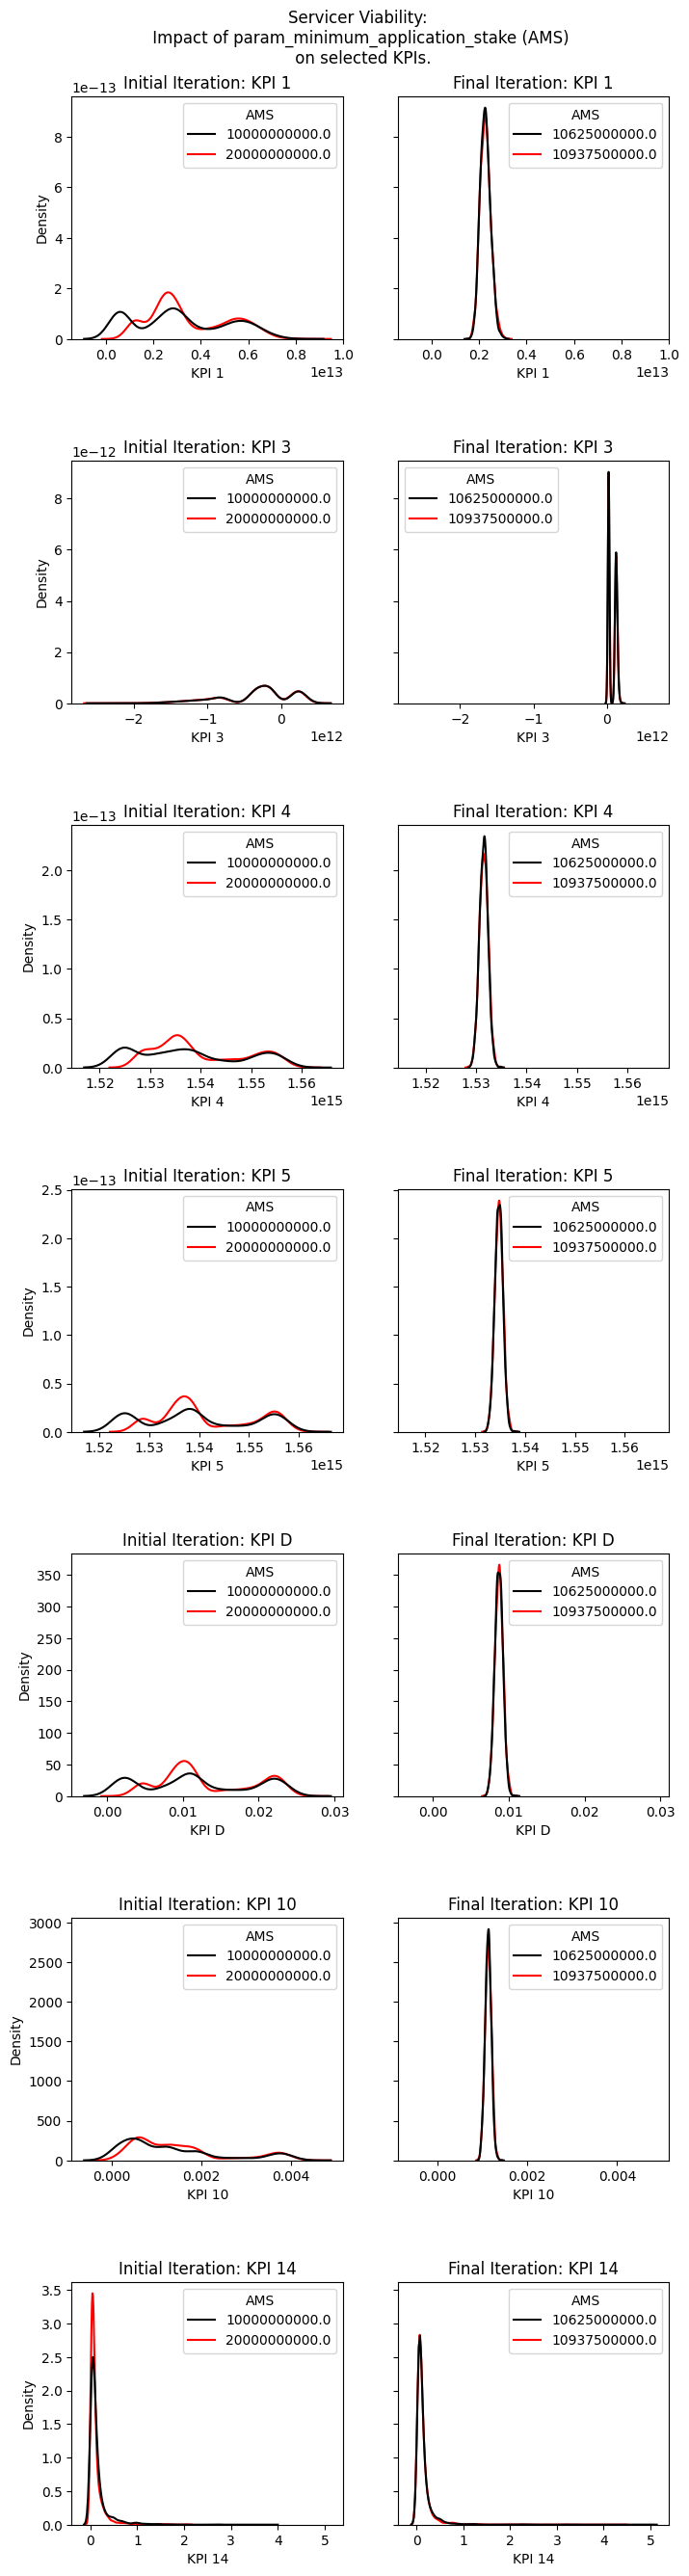

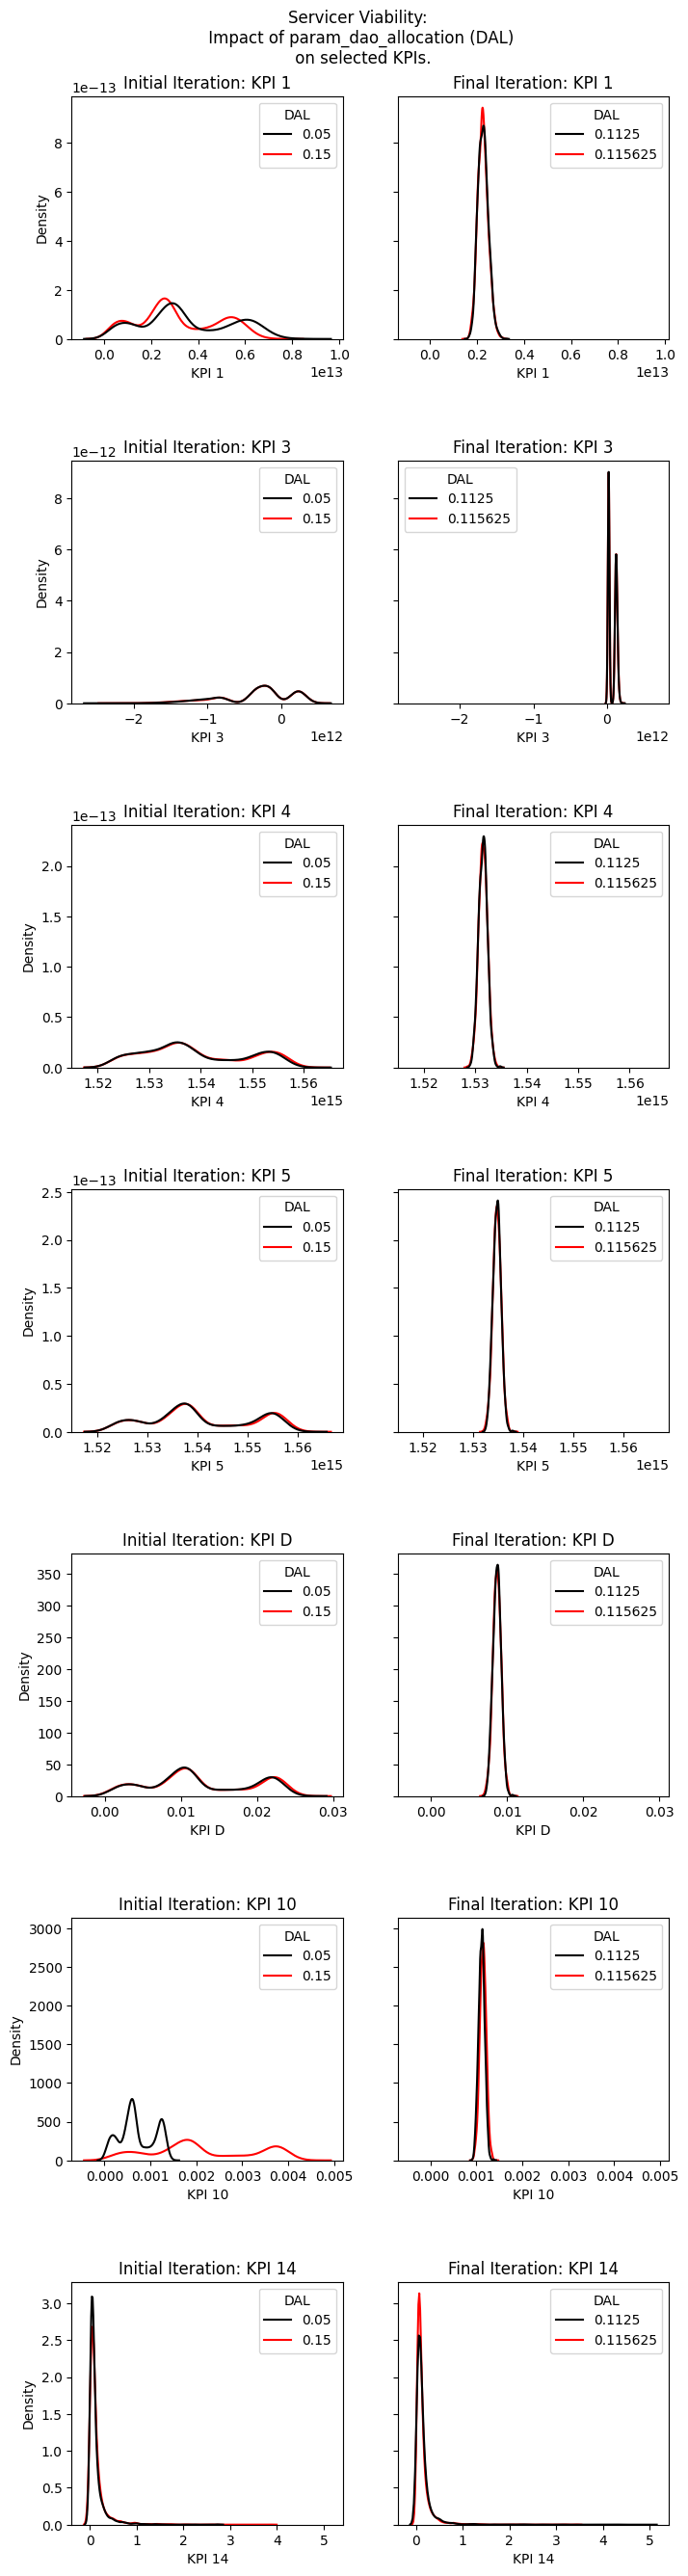

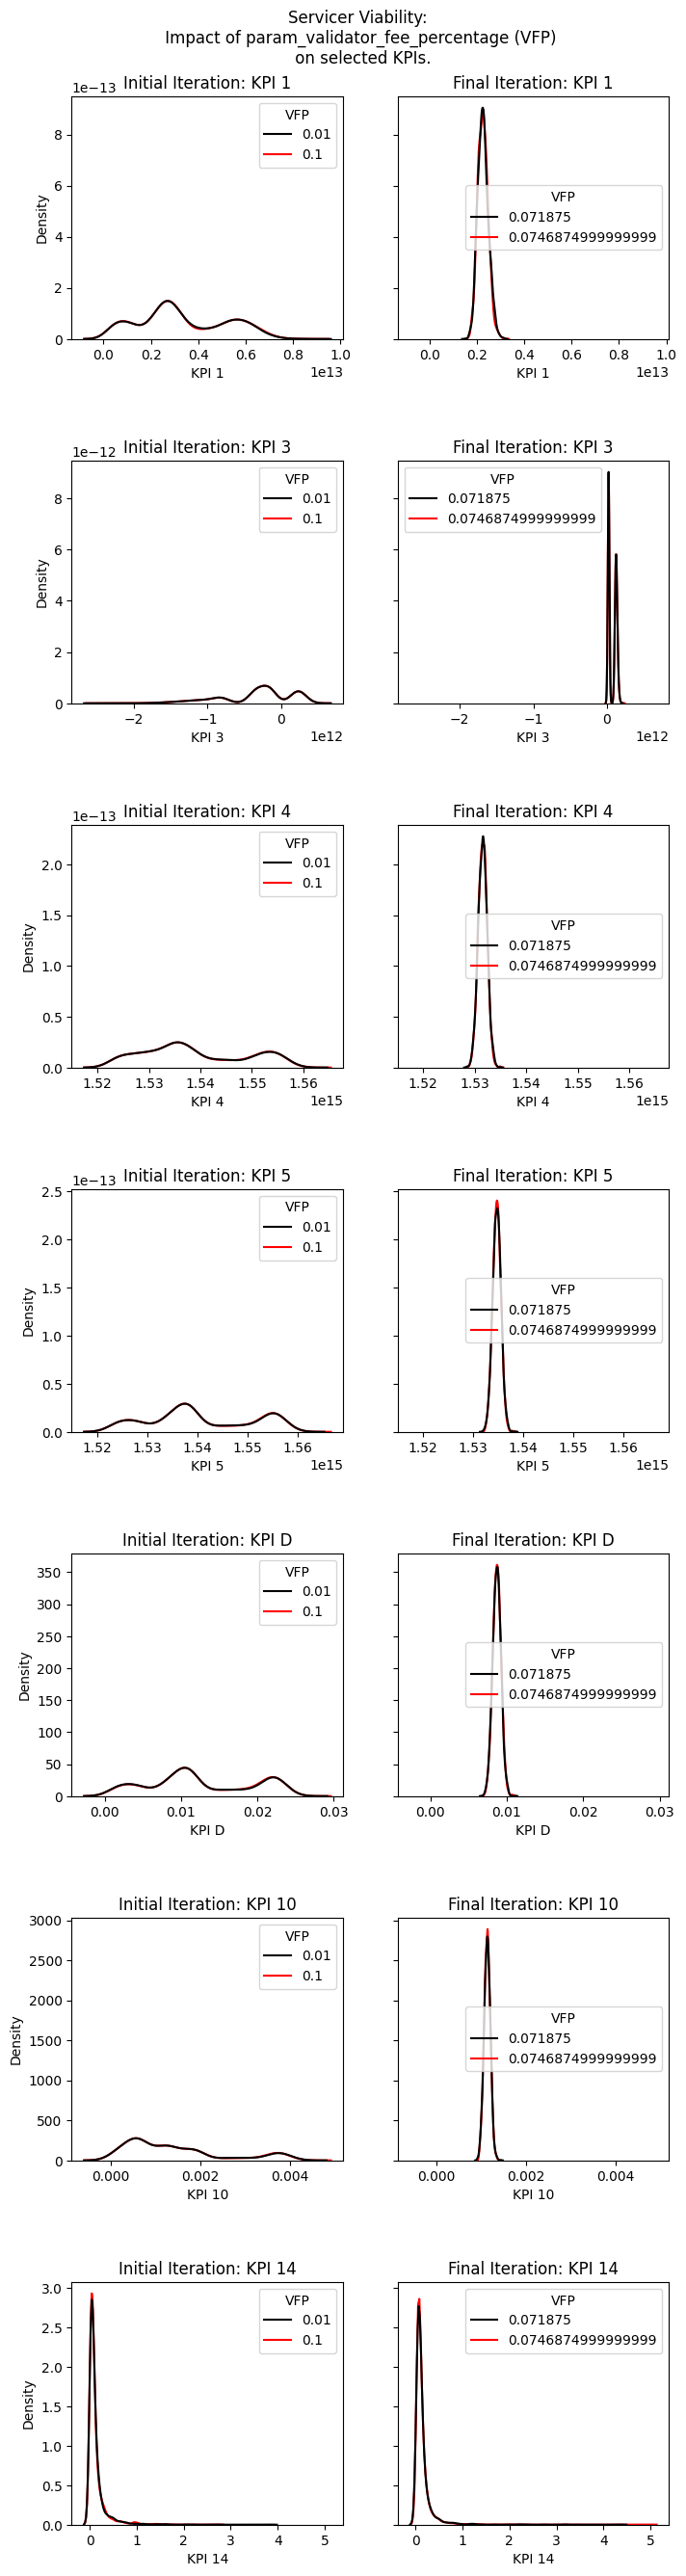

In [6]:
latest_adaptive_grid = max(kpis[scenario_sweep_category])
for param_name in kpis[scenario_sweep_category][latest_adaptive_grid]['variable_params']:
    make_initial_vs_final_plot(df = merged_df,
                           scenario_sweep_category = scenario_sweep_category,
                           param_name = "param_" + param_name, fig_width = 30)

# Conclusion

The simulation results place the gateway-related parameters `GFPR` and `GMS` front-and-center, as they require more careful 'tuning' to ensure that the gateway remains profitable across the “shock” of having a new service enter the ecosystem. This is evidenced by the fact that only the **servicer capital costs**, **gateway NPV** and **DAO allocation** threshold inequalities were initially unsatisfied, while the **servicer NPV**,  **circulating supply to available supply** and **net inflation** threshold inequalities were always satisfied. Of the former inequalities, the **DAO allocation** threshold was never satisfied—-this may indicate that the DAO allocation range of between 2% and 10% is too large, as simulation data tended to place this amount at around 0.1%.

Interestingly, the **servicer capital costs** threshold inequality was impacted the most by the `RTTM` and `AFPR` parameter values, as evidenced by the decision tree sensitivity analysis. The tree also shows that there were two different main parameter restrictions that appeared to provide threshold inequality satisfaction:
- a branch where `RTTM` was less than 118.75 and greater than 101.562 uPOKT/relay, `AFPR` was greater than 66.25 uPOKT, `DAL` was less than 11.7% of available supply, and `AMS` was greater than 10,312 POKT, comprising around 19.5% of the data;
- a branch where `RTTM` was less than 118.75 POKT, `AFPR` was greater than 66.25 uPOKT and less than 97.188 POKT, and `DAL` was less than 11.7% of available supply, comprising around 14.6% of the data.

Although there are other combinations which also contribute to the satisfaction of this inequality, they are generally distinguished by 1) `RTTM` being bounded above by 118.75 POKT, and 2) `AFPR` being bounded below by 66.255. In terms of importance, `RTTM` and `AFPR` contributed the most to threshold inequality satisfaction.

The **gateway NPV** decision tree was, as expected, mainly influenced by `GFPR` and `GMS`. Values of `GFPR` less than 18.438 and `GMS` less than 137,500 POKT provided inequality satisfaction for more than 58.2% of the data.

The density impact results tend to indicate that higher `GFPR` values reduced both the mean and variance of gateway NPV KPI, perhaps as to be expected, while `GMS` did not appear to have this impact (only a small reduction in variance is observed). Higher `DAL` values were associated with a lower variance of servicer capital costs, and slightly reduced average, indicating (on the margin) a slight positive impact on the servicer cost-to-reward ratio.

A striking conclusion is that the `AFPR` should exceed the `GFPR` by a large amount. This may provide an incentive for applications to 'masquerade' as gateways, serving their own relay requests and incurring the lower `GFPR`, although this must be balanced against the significantly higher gateway staking costs. It can be worth investigating in the future to what extent data-driven relay traffic and application cost structure assumptions may influence this result.

Finally, since there were no scenarios where the **servicer NPV** threshold inequality was violated, this may indicate that the minimum required NPV value of 750 POKT is simply too low to provide a meaningful lower bound. On the other hand, the cost structure of a servicer in this modeling environment is very simple, and it may be that a more realistic, data-driven representation of servicer costs would bring the existing lower bound on servicer NPV to bear. This is a potentially valuable avenue for future research. 

In any event, the conclusion of this study is that the parameter ranges recommended above support (or at least do not detract from) servicer profitability in the V1 ecosystem.